<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/2021_Data_Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Les durées sont indicatives et dépendent évidemment de chacun. Si tu vois que tu n'arrives pas à finir une partie dans les temps, n'hésite pas à passer à la partie suivante.

Si tu n'as pas le temps de tout finir, tu pourras reprendre ce checkpoint ce week-end ou la semaine prochaine. Tu indiqueras simplement en commentaire les scripts que tu as complété a posteriori.

# Partie 1 : Data exploration et processing - Python et Pandas - environ 30 min

Exécute le code ci-dessous. Tu obtiendras un DataFrame avec 10 000 commentaires de restaurants. 
- date : la date du commentaire
- stars : la note attribuée (de 1 à 5)
- text : le texte du commentaire
- type : review
- useful : le nombre d'utilisateur ayant indiqué ce commentaire comme "utile"
- suivent ensuite 27 colonnes indiquant le nombre d'occurences de certains mots dans le commentaire.

Le but de ce checkpoint sera d'explorer ce dataset, puis de proposer un modèle de prédiction de note positive en fonction des autres variables.

Commence par vérifier qu'il n'y a pas de valeur manquante.

In [ ]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/murpi/wilddata/raw/master/quests/restaurant.zip", index_col='Unnamed: 0')
df_restaurants.head()

## Colonne "useful"

Trace un histogramme et un boxplot afin de représenter la distribution de cette variable.

Les données sont-elles bien réparties ?

## Colonne "text"

Utilise **apply** pour créer une nouvelle colonne "len_text", indiquant la longueur (le nombre de caractères) de chacun des commentaires.

Trace un histogramme et un boxplot afin de représenter la distribution de cette colonne "len_text". Les valeurs sont-elles bien réparties ? La plupart des commentaires sont-ils plutôt longs ou courts ?

## Colonne "stars"

- Trace un scatterplot pour comparer la colonne "useful" et la colonne "stars". Te semble-t-il y avoir une corrélation ? 

- Idem entre "len_text" et "stars".

- Trace une heatmap de corrélation pour l'ensemble du DataFrame. Pense à prendre une échelle de couleur divergente centrée sur 0. Y a-t-il des fortes corrélations dans ce dataset ?



## Target

Crée une colonne "bad_good" qui contiendra :
- "bad" si la note (stars) vaut 1, 2 ou 3 
- "good" si la note (stars) vaut 4 ou 5

Cette nouvelle colonne sera notre "target".

# Partie 2 : Machine learning (classification supervisée) - scikit-learn - environ 1h

Commence par définir X et y.
- X contiendra toutes les colonnes **numériques SAUF "stars" !** (soit 29 colonnes). *Pour cette partie nous prenons uniquement les colonnes numériques. Nous utiliserons le texte des commentaires dans la partie suivante NLP.*
- y sera la colonne "bad_good"


## Train test split

Effectue un train test split avec `random_state = 32`

## Mise à l'échelle

Standardise les données

## Régression logistique

Entraine une régression logistique sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

## Decision tree

Entraine un arbre de décision sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

## Decision tree - hyperparamètres

Change les paramètres du modèle pour réduire l'overfitting. Arrives-tu à un meilleur score qu'avec la régression logistique ?

## Question bonus (optionnelle)

Utilise gridsearch pour trouver les meilleurs paramètres

# Partie 3 : NLP - Sentiment analysis - environ 1h

Définis une nouvelle variable `X_text` qui ne contiendra que la colonne `text`. y reste identique. 


## Crée une fonction de nettoyage des stopwords et de la ponctuation

Tu peux appeler ta fonction `func_clean`.
Ta fonction doit prendre un `str` en unique paramètre, et retourner un `str`.

Par exemple :

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

## Applique cette fonction 

Applique cette fonction à `X_text` et enregistre le résultat dans `X_clean`.

## Train test split

Découpe tes données `X_clean` et `y` avec un train test split, et le même `random_state = 32`.



## TfidfVectorizer

- Entraine `TfidfVectorizer` sur `X_train` 
- Transforme avec ton vectorizer `X_train` et stocke le résultat dans `X_train_vecto`.
- Transforme avec ton vectorizer `X_test` et stocke le résultat dans `X_test_vecto`.

## Régression logistique

Entraine une régression logistique sur `X_train_vecto` et `y_train`.

Compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils meilleurs que dans tes modèles du début du checkpoint ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

# Partie 4 : WebScraping - BeautifulSoup - environ 1h30

C'est l'hiver, et tu souhaiterais faire une petite étude de marché sur le prix des bonnets.
Effectue un webscraping des titres et des prix de la page suivante : https://www.primark.com/en/search?text=beanie
Essaye d'afficher le résultat dans un DataFrame.  Il doit y avoir environ une vingtaine de bonnets.

Voici un exemple de résultat attendu (évidemment, les prix et les produits peuvent bouger tous les jours, tu auras donc un résultat différent).






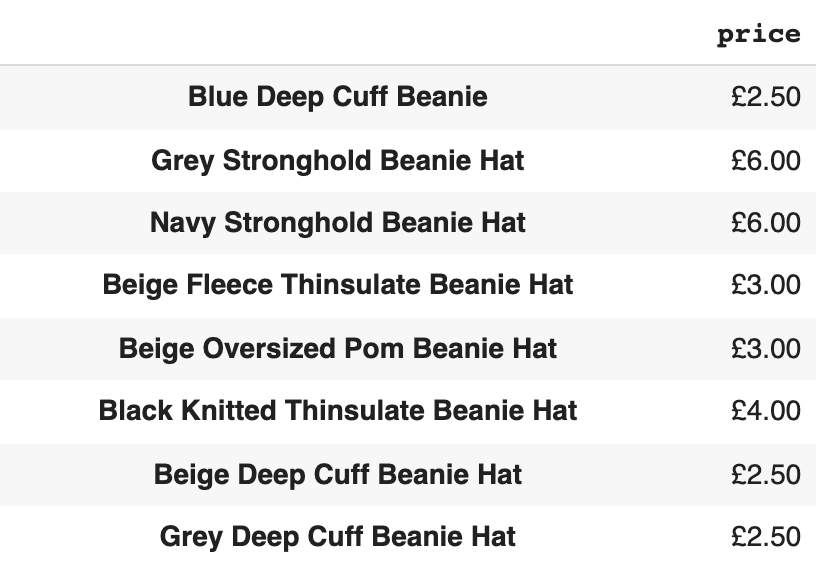